In [53]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.cm as cm

from matplotlib.cm import get_cmap
from create_in import create_in
from out_reader import out_reader

In [54]:
N = 400

S_namics = 50

alpha = 0.4

Cs = 0.092

chi_range = [1.2, 1.3, 1.45, 1.7, 1.9]

chi_surf = 0.5

In [55]:
phi_brush_prof, psi_brush_prof, ends_brush_prof = {}, {}, {}
for chi in chi_range:
    file_name_pro = create_in(
            template_surf_charge='/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/scf_templates/flat_brush_chi.in',
            range_param='Cs',
            min_val=0.1,
            max_val=0.1,
            Cs=Cs,
            chi=chi,
            chi_surf = chi_surf,
            N_layers=N,
            N=N,
            S=S_namics,
            alpha=alpha,
            Kuhn = '1e-09',
        )

    # Парсим профили
    psi, phi_brush, phi_end_brush = out_reader(alpha = alpha,file_names=file_name_pro)
    phi_brush_prof[chi] = (phi_brush)
    psi_brush_prof[chi] = (psi)
    ends_brush_prof[chi] = (phi_end_brush)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.062399e+00 |g| = 5.089267e+00 alpha = 1.000000e+00 
hessian scaling: 0.562885
it =  1  E = 1.911829e+00 |g| = 4.810612e+00 alpha = 1.196492e-01 
it =  2  E = 3.975649e+00 |g| = 5.031983e+00 alpha = 2.730346e-02 
it =  3  E = 4.198028e+00 |g| = 4.751917e+00 alpha = 2.143939e-02 
it =  4  E = 5.031194e+00 |g| = 4.775925e+00 alpha = 1.403914e-02 
it =  5  E = 3.628332e+00 |g| = 4.513006e+00 alpha = 2.407133e-02 
it =  6  E = 3.234285e+00 |g| = 4.414710e+00 alpha = 2.781887e-02 
it =  7  E = 3.941080e+00 |g| = 4.296504e+00 alpha = 1.715461e-02 
it =  8  E = 3.117479e+00 |g| = 4.126826e+00 alpha = 2.487990e-02 
it =  9  E = 2.628811e+00 |g| = 4.114532e+00 alpha = 3.321698e-02 
it =  10  E = 3.458571e+00 |g| = 3.862741e+0

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2472076/1735881473.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(phi_brush, label=f'$\chi = {chi}$', linewidth=3.2, color=base_color, linestyle="-")
/tmp/ipykernel_2472076/1735881473.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


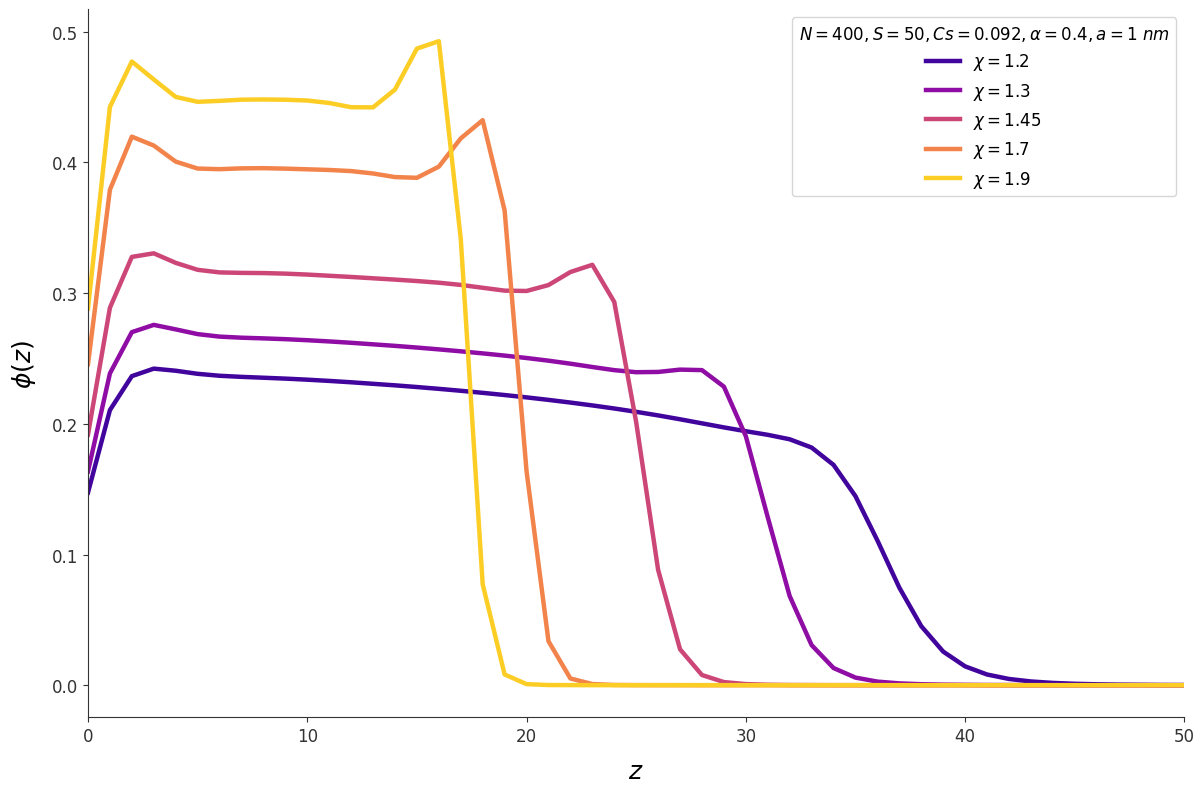

In [60]:
plt.figure(figsize=(12, 8))
color_map = get_cmap("plasma")

for i, (chi, (phi_brush)) in enumerate(phi_brush_prof.items()):
    
    base_color = color_map((i + 0.5) / len(chi_range))
    
    plt.plot(phi_brush, label=f'$\chi = {chi}$', linewidth=3.2, color=base_color, linestyle="-")

# Настройка визуализации
plt.xlabel("$z$", fontsize=18, labelpad=10)
plt.ylabel("$\\phi(z)$", fontsize=18, labelpad=10)
plt.legend(fontsize=12, title = f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', title_fontsize=12, loc="upper right")
plt.tight_layout()
# plt.ylim(0, 0.03)
plt.xlim(0, 50)

# Добавляем фон и рамку
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#333333")
plt.gca().spines["bottom"].set_color("#333333")
plt.gca().tick_params(axis='both', which='major', labelsize=12, colors="#333333")

# Показ графика
# plt.savefig('phi_cs_0.092.pdf', dpi=300, bbox_inches='tight')
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2472076/1296103662.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(psi, label=f'$\chi = {chi}$', linewidth=3.2, color=base_color, linestyle="-")
/tmp/ipykernel_2472076/1296103662.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


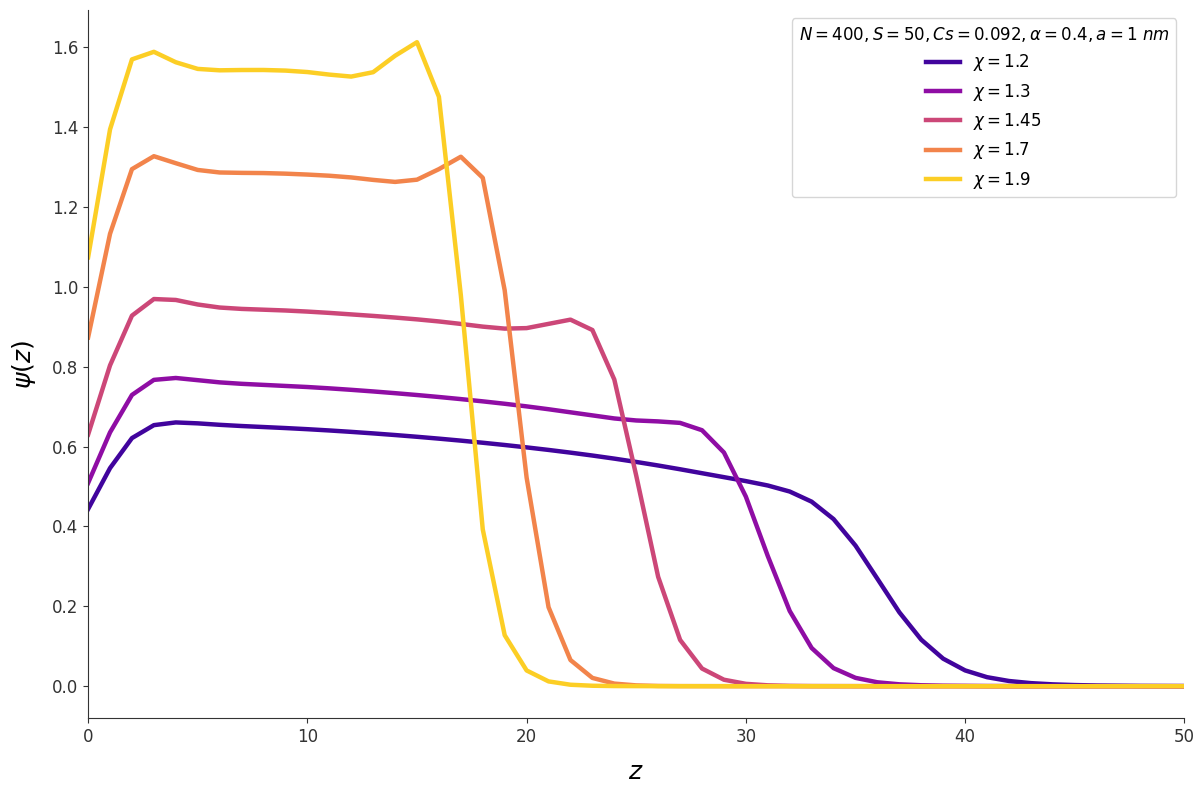

In [61]:
plt.figure(figsize=(12, 8))
color_map = get_cmap("plasma")

for i, (chi, (psi)) in enumerate(psi_brush_prof.items()):
    
    base_color = color_map((i + 0.5) / len(chi_range))
    
    plt.plot(psi, label=f'$\chi = {chi}$', linewidth=3.2, color=base_color, linestyle="-")
    
# Настройка визуализации
plt.xlabel("$z$", fontsize=18, labelpad=10)
plt.ylabel("$\\psi(z)$", fontsize=18, labelpad=10)
plt.legend(fontsize=12, title = f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', title_fontsize=12, loc="upper right")
plt.tight_layout()
# plt.ylim(0, 0.03)
plt.xlim(0, 50)

# Добавляем фон и рамку
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#333333")
plt.gca().spines["bottom"].set_color("#333333")
plt.gca().tick_params(axis='both', which='major', labelsize=12, colors="#333333")

# Показ графика
# plt.savefig('psi_cs_0.092.pdf', dpi=300, bbox_inches='tight')
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2472076/2232406226.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(phi_end_brush, label=f'$\chi = {chi}$', linewidth=3.2, color=base_color, linestyle="-")
/tmp/ipykernel_2472076/2232406226.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


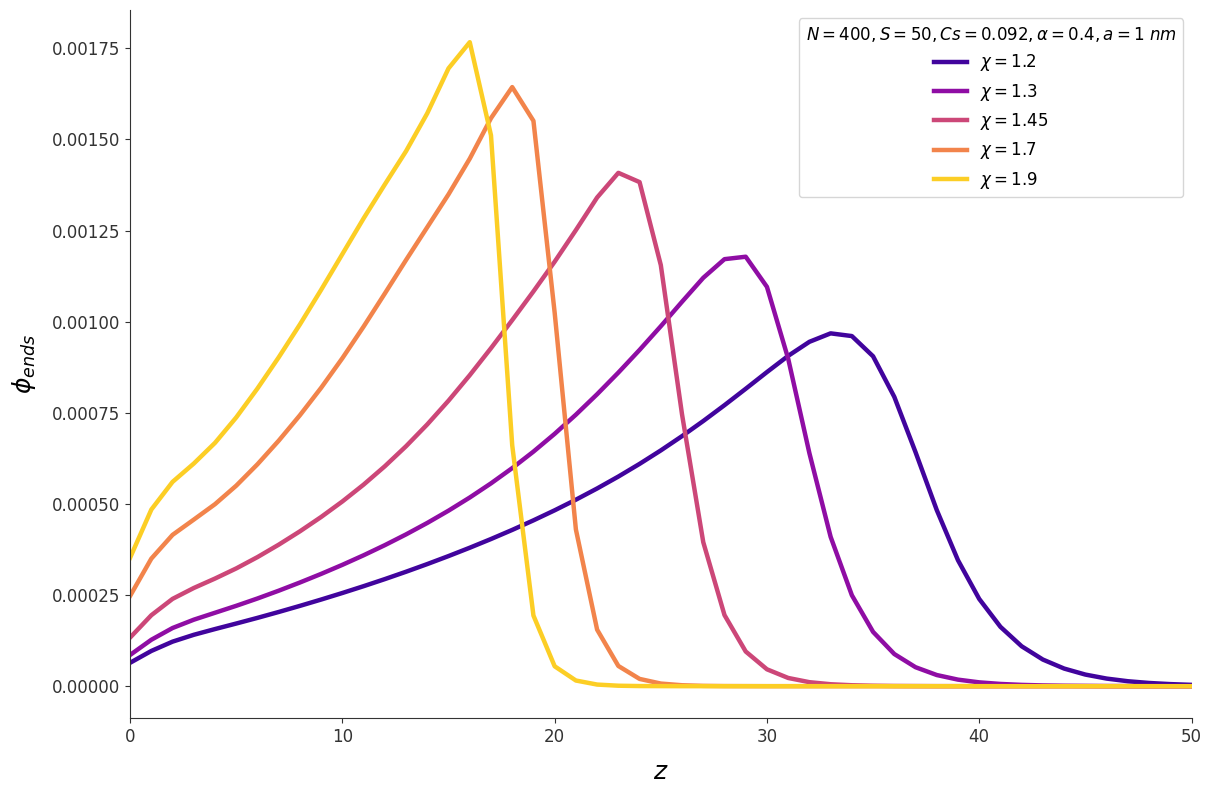

In [ ]:
plt.figure(figsize=(12, 8))
color_map = get_cmap("plasma")

for i, (chi, (phi_end_brush)) in enumerate(ends_brush_prof.items()):
    
    base_color = color_map((i + 0.5) / len(chi_range))
    
    plt.plot(phi_end_brush, label=f'$\chi = {chi}$', linewidth=3.2, color=base_color, linestyle="-")

# Настройка визуализации
plt.xlabel("$z$", fontsize=18, labelpad=10)
plt.ylabel("$\\phi_{ends}$", fontsize=18, labelpad=10)
plt.legend(fontsize=12, title = f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', title_fontsize=12, loc="upper right")
plt.tight_layout()
# plt.ylim(0, 0.03)
plt.xlim(0, 50)

# Добавляем фон и рамку
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#333333")
plt.gca().spines["bottom"].set_color("#333333")
plt.gca().tick_params(axis='both', which='major', labelsize=12, colors="#333333")

# Показ графика
# plt.savefig('phi_ends_cs_0.092.pdf', dpi=300, bbox_inches='tight')
plt.show()